In [71]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [7]:
data= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [8]:
data.head()

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [25]:
data=data.drop(columns=["effective_to_date"], axis=1)

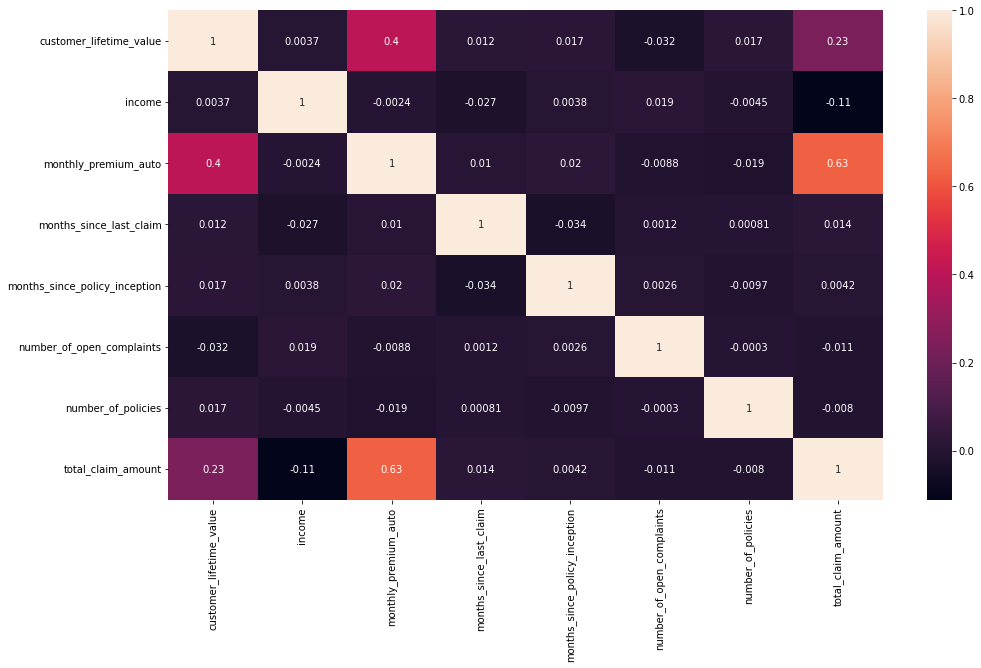

In [26]:
fig=plt.figure(figsize=(16,9))
heat= sns.heatmap(data.corr(),annot=True);

In [27]:
data["number_of_open_complaints"].unique()

array([0, 3, 1, 2, 4, 5])

In [32]:
data["customer_lifetime_value"].unique()

array([ 4809,  2228, 14947, ..., 19228, 23893, 11971])

In [33]:
data["income"].unique()

array([48029, 92260, 22139, ..., 39837, 64195, 68942])

In [34]:
data["monthly_premium_auto"].unique()

array([ 61,  64, 100,  97, 117,  63, 154,  85, 127,  62,  99,  69, 116,
       114,  66,  73,  94, 104, 189,  74, 121, 110, 111,  72, 115, 159,
       101,  65,  82,  71, 126,  68, 199,  96,  67, 125, 249, 105,  92,
        78,  77,  79, 223, 242,  70, 102, 109, 107, 119, 194, 113, 106,
       247,  80,  86,  81,  83, 122, 253, 196, 132, 139,  84, 130,  93,
       103, 112, 222, 118,  88, 182, 283,  90, 128,  89, 235, 190,  76,
        87, 133, 153, 129,  98, 148, 123,  91, 211, 131, 108, 187, 214,
       181, 173, 252,  95, 124, 137, 145, 188, 143, 198, 138, 245, 195,
       186, 170, 136, 161, 157, 141, 205, 271, 192, 142, 140, 134, 240,
       185, 244, 210, 184, 202, 296, 213, 273, 219, 135, 169, 155, 225,
       266, 215, 197, 256, 212, 158, 180, 166, 168, 183, 162, 191, 179,
       150, 146, 276, 165, 239, 237, 193, 229, 274, 207, 295, 208, 172,
       217, 206, 201, 171, 152, 156, 174, 238, 167, 151, 144, 163, 287,
       209, 290, 220, 228, 232, 178, 177, 275, 176, 281, 149, 29

In [35]:
data["months_since_last_claim"].unique()

array([ 7,  3, 34, 10, 33,  2,  8, 35, 19, 13,  5, 24, 25,  6, 20, 26, 14,
        9, 29, 11,  1, 18, 16, 30, 12,  4, 22, 31, 21, 28, 17, 15, 32, 23,
       27,  0])

In [36]:
data["months_since_policy_inception"].unique()

array([52, 26, 31,  3, 73, 99, 45, 24,  8, 29, 32, 25, 28, 87, 10, 74,  1,
       38, 58, 37,  7, 80, 95, 78, 63, 27, 97, 39, 11, 59, 46, 62, 13, 54,
       51, 22, 82, 91, 44, 43, 76, 48, 84,  6, 92, 12, 61,  4, 18, 66, 70,
       16, 75, 34, 35, 64,  9, 89,  0, 60, 71, 23, 55, 93,  2, 67, 81, 40,
       57, 86, 19, 72, 69, 33, 47, 42, 17, 49, 21, 83, 94, 30, 15, 50, 53,
       77, 41, 90,  5, 79, 56, 98, 20, 88, 65, 14, 85, 96, 36, 68])

In [39]:
data["number_of_policies"].unique()

array([9, 1, 2, 7, 4, 3, 6, 8, 5])

In [40]:
data["total_claim_amount"].unique()

array([ 292,  744,  480, ...,  559, 1137, 1621])

In [28]:
numerics= data.select_dtypes(include=np.number)

In [29]:
data.select_dtypes(include=np.number).columns.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [30]:
categoricals= data.select_dtypes(include=["object"])

In [31]:
data.select_dtypes(include=["object"]).columns.tolist()

['region',
 'response',
 'coverage',
 'education',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [87]:
cat_one_hot_encoded=pd.get_dummies(categoricals, drop_first=True)

In [88]:
cat_one_hot_encoded

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


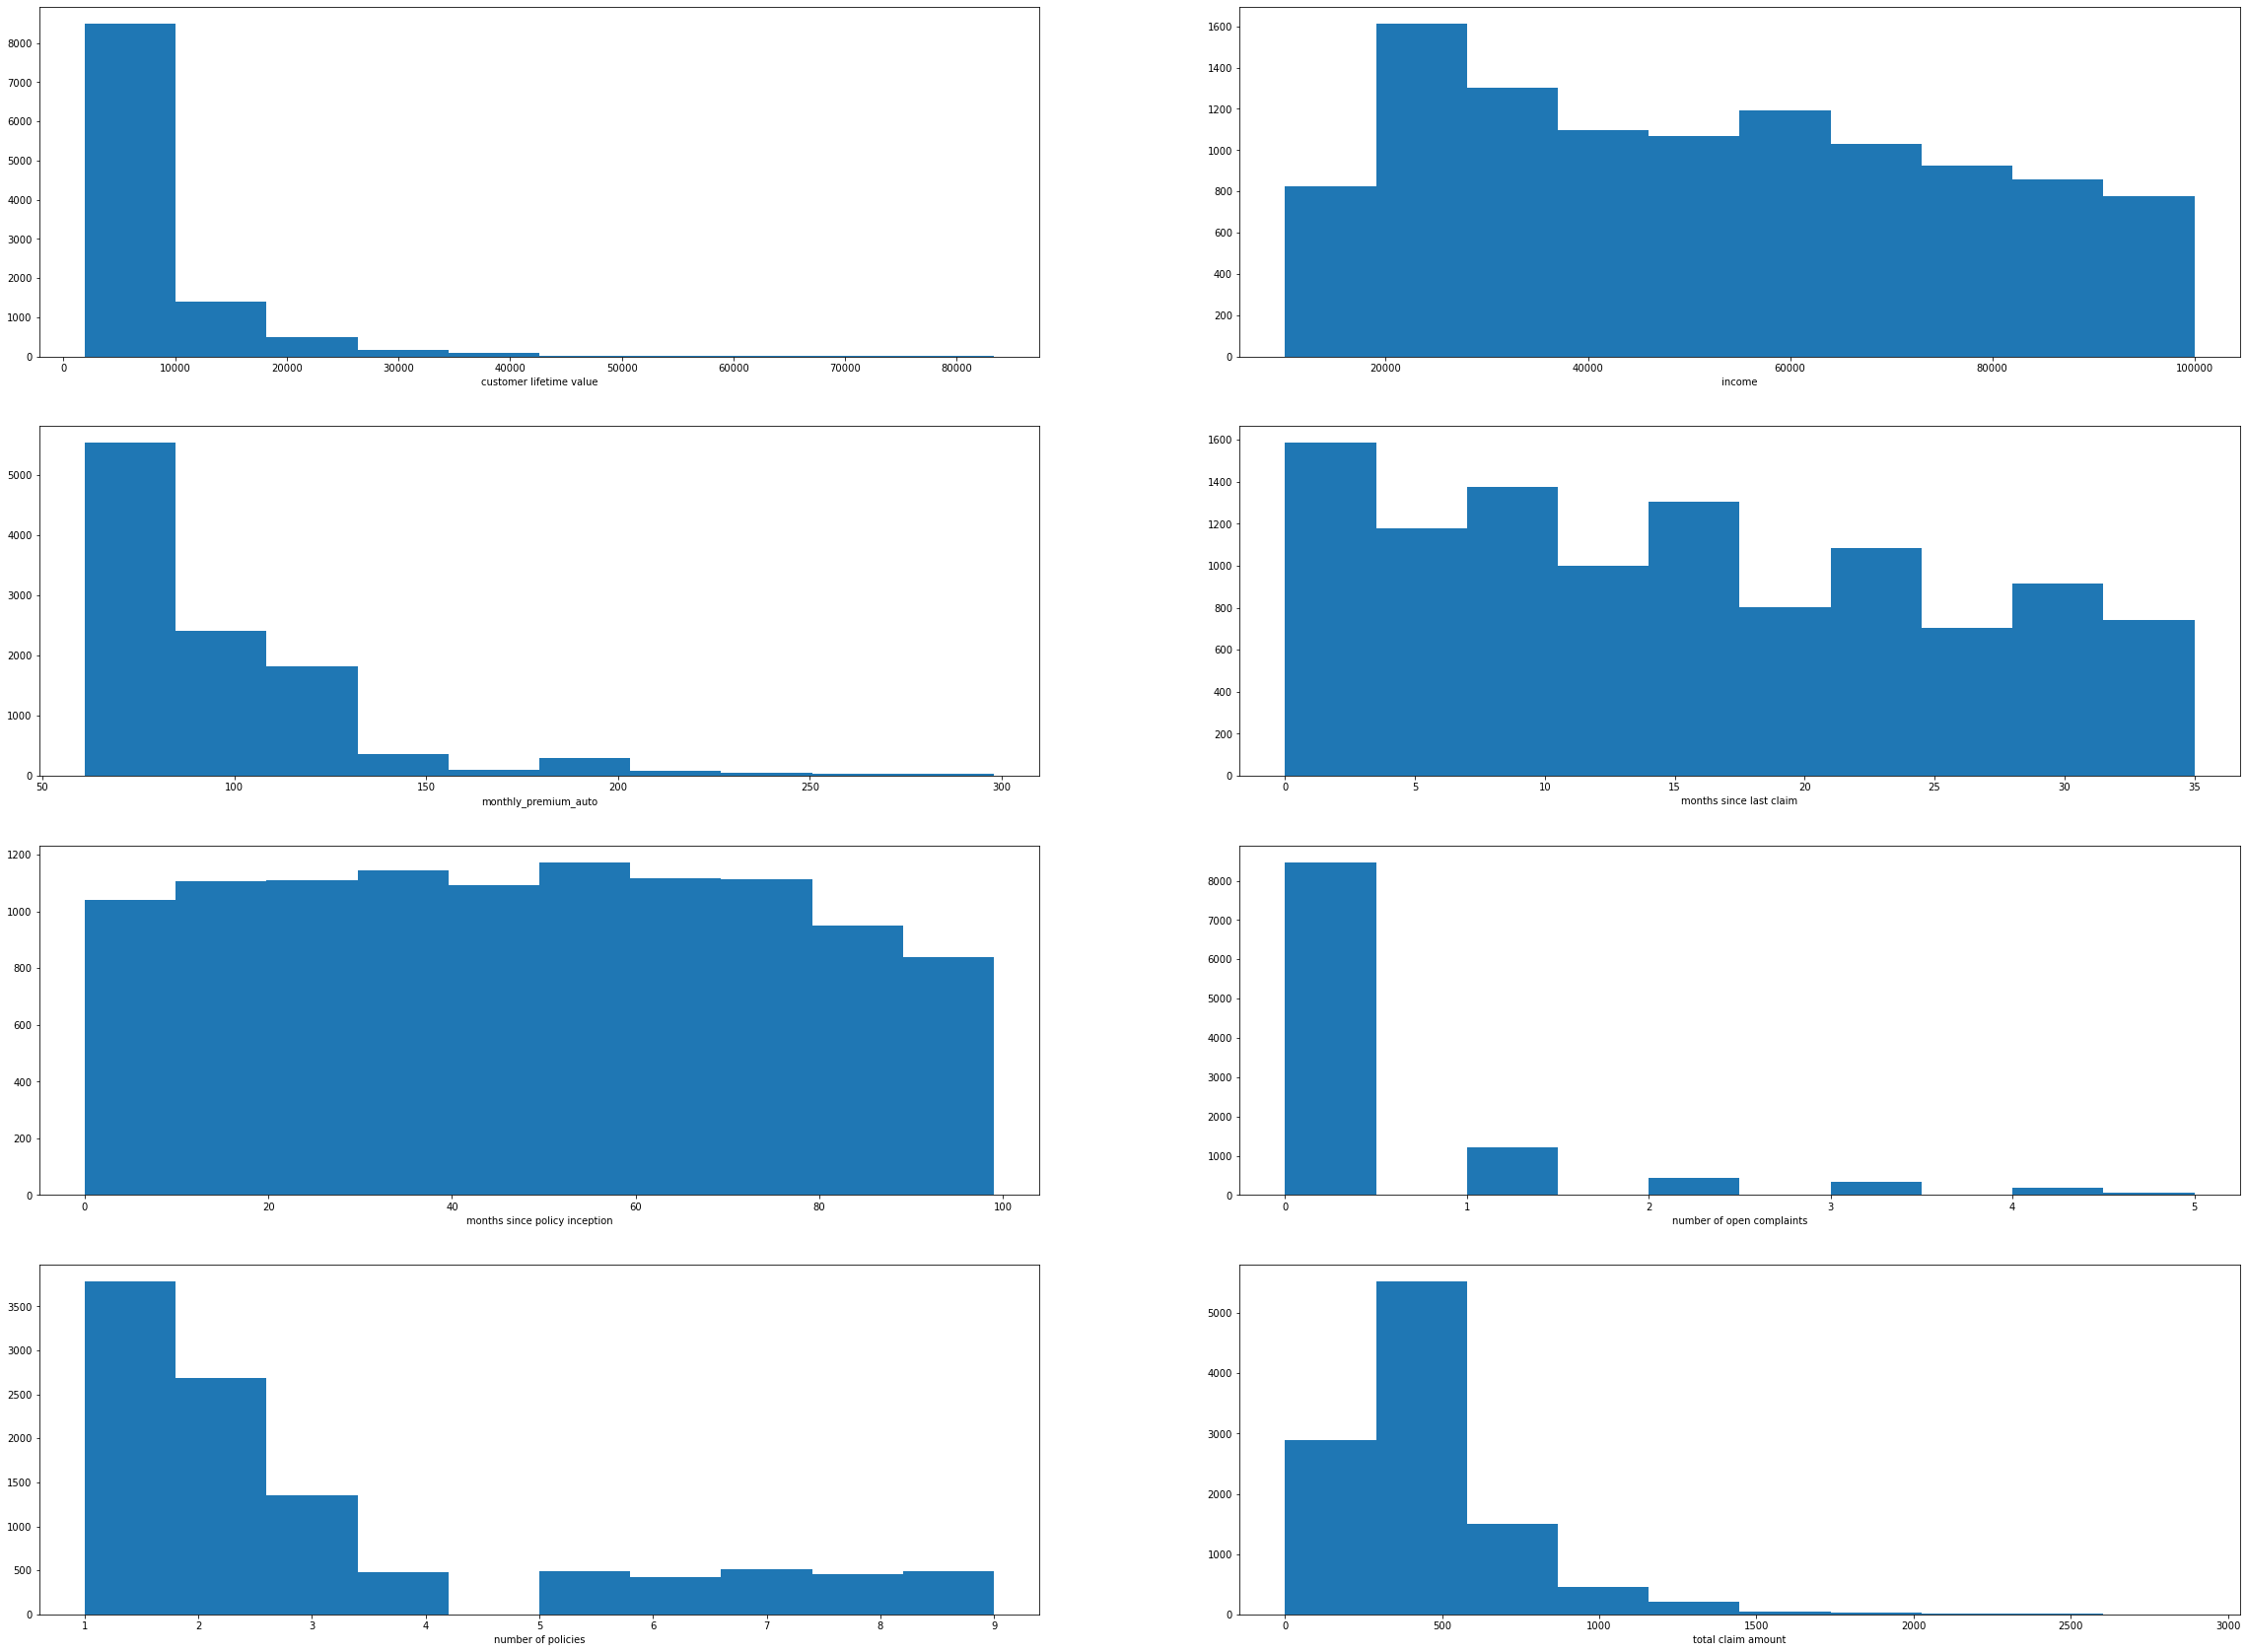

In [45]:
## first axis
fig=plt.figure(figsize=(40,30))

plt.subplot(4,2,1)
plt.hist(numerics["customer_lifetime_value"]);
plt.xlabel("customer lifetime value");

#second axis
plt.subplot(4,2,2)
plt.hist(numerics["income"]);
plt.xlabel("income");
#plt.title("this is a title")

##. third subplot
plt.subplot(4,2,3)
plt.hist(numerics["monthly_premium_auto"]);
plt.xlabel("monthly_premium_auto");

## fourth subplot
plt.subplot(4,2,4)
#plt.plot(x,-x,color="#e65ead")
plt.hist(numerics["months_since_last_claim"]);
plt.xlabel("months since last claim");

plt.subplot(4,2,5)
plt.hist(numerics["months_since_policy_inception"]);
plt.xlabel("months since policy inception");

plt.subplot(4,2,6)
plt.hist(numerics["number_of_open_complaints"]);
plt.xlabel("number of open complaints");

plt.subplot(4,2,7)
plt.hist(numerics["number_of_policies"]);
plt.xlabel("number of policies");

plt.subplot(4,2,8)
plt.hist(numerics["total_claim_amount"]);
plt.xlabel("total claim amount");

## Optional

### varA = income

In [48]:
varA=numerics[["income"]]

In [60]:
varA

,income
0,48029
1,92260
2,22139
3,49078
4,23675
...,...
10684,61541
10685,61146
10686,39837
10687,64195


In [64]:
varA_scaled=MinMaxScaler().fit_transform(varA)

In [89]:
varA_scaled

array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

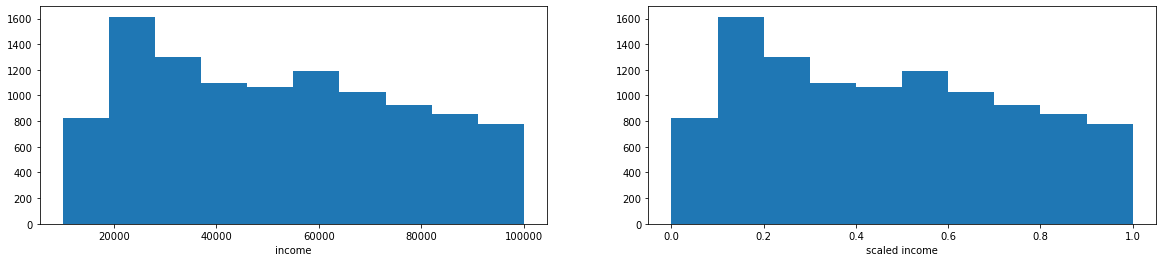

In [85]:
fig2=plt.figure(figsize=(20, 4))

plt.subplot(1,2,1)
plt.hist(varA);
plt.xlabel("income");

#second axis
plt.subplot(1,2,2)
plt.hist(varA_scaled);
plt.xlabel("scaled income");
#plt.title("this is a title")

In [66]:
varB= numerics[["customer_lifetime_value"]]

In [67]:
varB

,customer_lifetime_value
0,4809
1,2228
2,14947
3,22332
4,9025
...,...
10684,15563
10685,5259
10686,23893
10687,11971


In [73]:
varB_scaled=PowerTransformer().fit_transform(varB)

In [74]:
varB_scaled

array([[-0.33614341],
       [-1.86720472],
       [ 1.2922699 ],
       ...,
       [ 1.79973101],
       [ 1.0217405 ],
       [ 0.24359374]])

In [ ]:
plt.hist(varB_scaled);
plt.xlabel("scaled customer lifetime value");

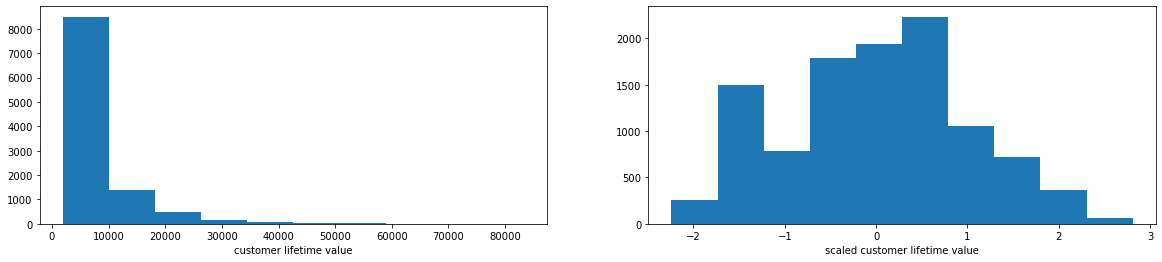

In [86]:
fig3=plt.figure(figsize=(20, 4))

plt.subplot(1,2,1)
plt.hist(varB);
plt.xlabel("customer lifetime value");

#second axis
plt.subplot(1,2,2)
plt.hist(varB_scaled);
plt.xlabel("scaled customer lifetime value");
#plt.title("this is a title")